# MNIST Data - Subclassing API

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype(np.float32) / 255.0, X_test.astype(np.float32)/ 255.0

In [3]:
tf.keras.backend.clear_session()

class MyModel(tf.keras.Model):
  def __init__(self, img_resolution):
    super(MyModel, self).__init__()
    self.flattenLayer = tf.keras.layers.Flatten(input_shape=img_resolution)
    self.denseLayer = tf.keras.layers.Dense(128, activation='relu')
    self.outputLayer = tf.keras.layers.Dense(10)    

  def call(self, x):
    x = self.flattenLayer(x)
    x = self.denseLayer(x)
    x = self.outputLayer(x)
    return x

In [4]:
# Create an instance of the model
model = MyModel(img_resolution=(28,28))

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name="loss")
optimizer_fn = tf.keras.optimizers.Adam()
metrics_fn = tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")

In [6]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=metrics_fn)

# Need to build model or else there wil be error.
model.build(input_shape=(None,28,28))

In [7]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 1s 692us/step - loss: 0.2821 - accuracy: 0.9199 - val_loss: 0.1296 - val_accuracy: 0.9647
Epoch 2/5
1688/1688 [==============================] - 1s 627us/step - loss: 0.1261 - accuracy: 0.9620 - val_loss: 0.0994 - val_accuracy: 0.9703
Epoch 3/5
1688/1688 [==============================] - 1s 618us/step - loss: 0.0849 - accuracy: 0.9748 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 4/5
1688/1688 [==============================] - 1s 603us/step - loss: 0.0639 - accuracy: 0.9807 - val_loss: 0.0844 - val_accuracy: 0.9765
Epoch 5/5
1688/1688 [==============================] - 1s 596us/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0782 - val_accuracy: 0.9777


In [9]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val]}')

loss                : ['0.28', '0.13', '0.08', '0.06', '0.05']
accuracy            : ['0.92', '0.96', '0.97', '0.98', '0.99']
val_loss            : ['0.13', '0.10', '0.09', '0.08', '0.08']
val_accuracy        : ['0.96', '0.97', '0.97', '0.98', '0.98']


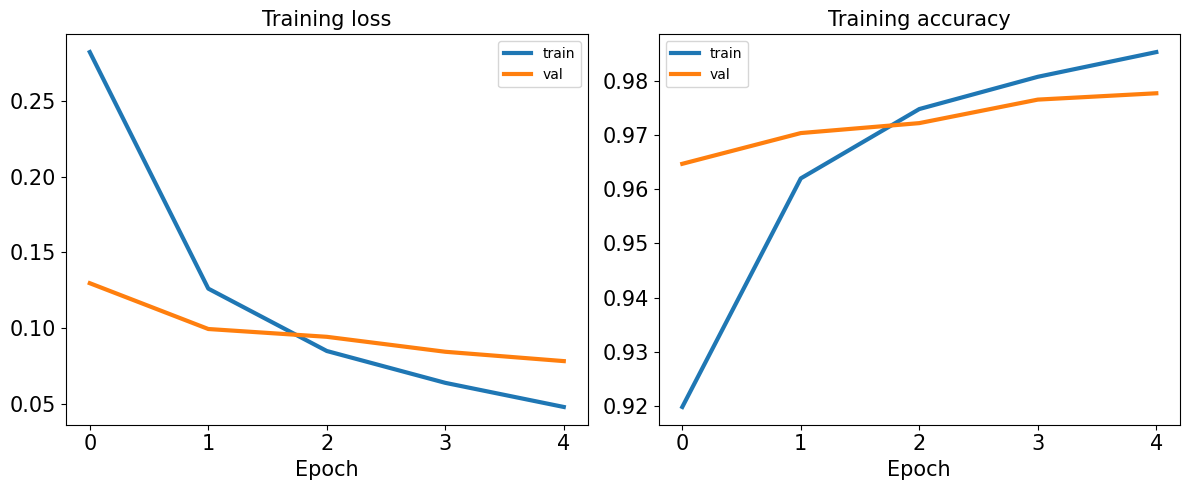

In [10]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

#plt.savefig('mnist1.pdf')

plt.show()

- The `Model.evaluate` method checks the models performance.

In [11]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 0s 390us/step - loss: 0.0731 - accuracy: 0.9765


[0.07305808365345001, 0.9764999747276306]

In [12]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(10000, 10)
[[ -8.091586    -7.455479     1.0689338    2.7549324  -15.53811
   -6.6513796  -16.840551    11.010497    -4.5035048   -0.49251842]
 [ -4.1282654    5.386021    14.777271     3.9714525  -20.490139
   -1.5772398   -2.2384052  -16.744827     4.6495385  -15.999116  ]]
